In [1]:
import os
import re
import sqlite3
import numpy as np
import pandas as pd

from explorer import UE, cluster_sampler

con = sqlite3.connect('/mnt/sextonlabdata/Active_Users_Data/Max/RaeLabCollab/MDA-M134_PalboR/PlexScreen/TenPointDoseResponse/AR500/CPOutput/Plex_Parental.sqlite')

df = []
for part in pd.read_sql_query("SELECT * FROM Per_Object", con, chunksize=int(1e6)):
    print(f"Read {len(part)} rows")
    df.append(part)#### import os

df = pd.concat(df)
df.fillna(value=0, inplace=True)
print(df.shape)
df.head()

2025-06-30 16:28:04.122093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-30 16:28:04.132971: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-30 16:28:04.136259: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-30 16:28:04.144545: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-30 16:28:04.826223: W tensorflow/compiler/tf2

Read 134881 rows
(134881, 868)


,ImageNumber,ObjectNumber,Cell_Number_Object_Number,Cell_AreaShape_Area,Cell_AreaShape_BoundingBoxArea,Cell_AreaShape_BoundingBoxMaximum_X,Cell_AreaShape_BoundingBoxMaximum_Y,Cell_AreaShape_BoundingBoxMinimum_X,Cell_AreaShape_BoundingBoxMinimum_Y,Cell_AreaShape_Center_X,...,Nucleus_Texture_Variance_Hoechst_6_02_256,Nucleus_Texture_Variance_Hoechst_6_03_256,Nucleus_Texture_Variance_Lipids_6_00_256,Nucleus_Texture_Variance_Lipids_6_01_256,Nucleus_Texture_Variance_Lipids_6_02_256,Nucleus_Texture_Variance_Lipids_6_03_256,Nucleus_Texture_Variance_Phalloidin_6_00_256,Nucleus_Texture_Variance_Phalloidin_6_01_256,Nucleus_Texture_Variance_Phalloidin_6_02_256,Nucleus_Texture_Variance_Phalloidin_6_03_256
0,1,1,1,25568.0,36442.0,547.0,133.0,273.0,0.0,397.356031,...,8.640480,8.210937,0.0,0.0,0.0,0.0,2.822083,2.776453,2.767566,2.740734
1,1,2,2,27753.0,45900.0,889.0,204.0,664.0,0.0,775.747775,...,4.771703,4.755617,0.0,0.0,0.0,0.0,4.348590,4.587652,4.948117,4.303542
2,1,3,3,11454.0,15732.0,1324.0,163.0,1186.0,49.0,1254.331587,...,6.363698,6.535746,0.0,0.0,0.0,0.0,1.356897,1.347025,1.450292,1.352577
3,1,4,4,27087.0,46004.0,674.0,212.0,457.0,0.0,575.868018,...,10.769016,10.990859,0.0,0.0,0.0,0.0,1.613169,1.627618,1.658072,1.627340
4,1,5,5,23942.0,36120.0,1181.0,210.0,1009.0,0.0,1085.120834,...,10.836624,10.934621,0.0,0.0,0.0,0.0,2.250821,2.290712,2.264320,2.228484


In [2]:
img = pd.read_sql_query("SELECT ImageNumber, Image_Metadata_WellID, Image_Metadata_Field, Image_FileName_CMO, Image_FileName_Hoechst, Image_FileName_Lipids FROM Per_Image", con)
img.shape

(3452, 6)

In [3]:
df = pd.merge(df, img, on='ImageNumber')

In [4]:
meta_cols = df.columns[df.columns.str.contains(pat='Metadata|Location|Center|Parent|Children|Execution', flags=re.IGNORECASE)].tolist()
data_cols = df.drop(columns=meta_cols).select_dtypes(include='float64').columns.tolist()

In [5]:
# for c in data_cols:
#     print(c)

In [6]:
meta_data = pd.read_excel('/mnt/sextonlabdata/Active_Users_Data/Max/RaeLabCollab/MDA-M134_PalboR/PlexScreen/TenPointDoseResponse/AR500/Cellsperwell_fix.xlsx',
                          usecols=['Image_Metadata_WellID=WellID','compound','concentration (uM)'])
meta_data['Image_Metadata_WellID'] = meta_data['Image_Metadata_WellID=WellID']
meta_data.head()

,Image_Metadata_WellID=WellID,compound,concentration (uM),Image_Metadata_WellID
0,A01,Gilteritinib,0.155998,A01
1,A02,Taxol,0.040000,A02
2,A03,L-DOPA,0.623961,A03
3,A04,Loralatinib,2.479380,A04
4,A05,Olanzapine,0.623961,A05


In [7]:
print(df.shape)
df = pd.merge(df, meta_data, on='Image_Metadata_WellID')
print(df.shape)

(134881, 873)
(134881, 876)


In [8]:
df = df.sample(frac=0.4)

In [9]:
ue = UE(df=df, data_cols=data_cols)
ue.embed()

/hdd/tools/UMAP-Explorer/explorer/umap_explorer.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.data_cols].fillna(value=self.df[self.data_cols].mean(), inplace=True)
/home/ben/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


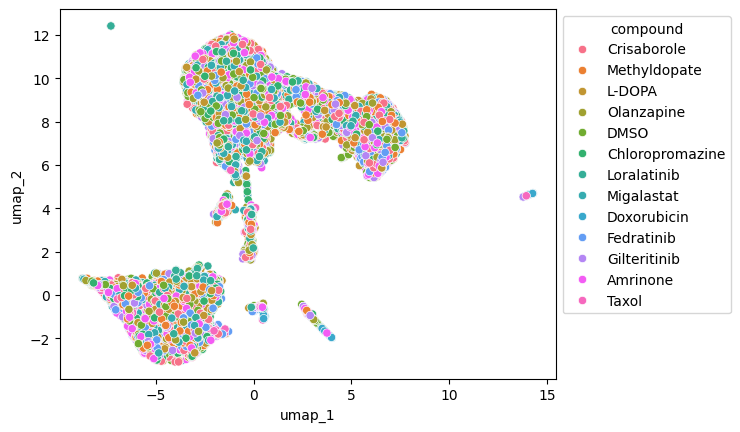

In [10]:
ue.plot(color_on='compound')

In [11]:
ue.cluster()

Cluster Silhoutte Score: 0.429390013217926
Best value is 1, 0 indicates overlapping clusters, Negative values indicates poorly assigned clusters



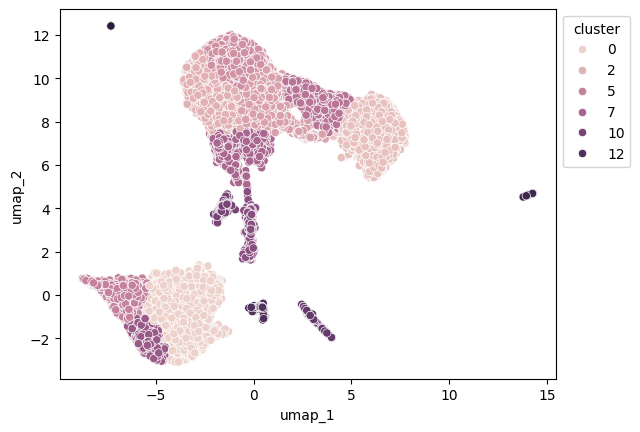

In [12]:
ue.plot(color_on='cluster')

In [13]:
imgdir  = '/mnt/instrumentdata/CV8000/Max/AR500-DoseResponse-9.19.2024-60X_20240919_101620/PECCU/'
outdir = 'example_output/'

ue.get_cluster_imgs(imgdir, outdir, 'Image_FileName_CMO', 'Image_FileName_Hoechst', 'Image_FileName_Lipids', n_sampels=2)

26it [00:07,  3.45it/s]/home/ben/.local/lib/python3.12/site-packages/skimage/_shared/utils.py:328: UserWarning: example_output/cluster_13_object_26_.tif is a low contrast image
  return func(*args, **kwargs)
27it [00:08,  3.50it/s]/home/ben/.local/lib/python3.12/site-packages/skimage/_shared/utils.py:328: UserWarning: example_output/cluster_13_object_27_.tif is a low contrast image
  return func(*args, **kwargs)
30it [00:09,  3.29it/s]


In [14]:
ue.df.shape

(53952, 879)

In [15]:
ue.df.iloc[0]['Image_FileName_CMO']

'PECCU_I12_T0001F005L01A01Z01C03.tif'

In [16]:
ue.df.head()

,ImageNumber,ObjectNumber,Cell_Number_Object_Number,Cell_AreaShape_Area,Cell_AreaShape_BoundingBoxArea,Cell_AreaShape_BoundingBoxMaximum_X,Cell_AreaShape_BoundingBoxMaximum_Y,Cell_AreaShape_BoundingBoxMinimum_X,Cell_AreaShape_BoundingBoxMinimum_Y,Cell_AreaShape_Center_X,...,Image_Metadata_Field,Image_FileName_CMO,Image_FileName_Hoechst,Image_FileName_Lipids,Image_Metadata_WellID=WellID,compound,concentration (uM),umap_1,umap_2,cluster
66124,1829,21,21,23732.0,34400.0,160.0,522.0,0.0,307.0,65.986643,...,005,PECCU_I12_T0001F005L01A01Z01C03.tif,PECCU_I12_T0001F005L01A01Z01C01.tif,PECCU_I12_T0001F005L01A02Z01C04.tif,I12,Crisaborole,9.990010,-0.828735,9.385896,2
82010,2117,16,16,16043.0,21666.0,1101.0,525.0,944.0,387.0,1016.758836,...,006,PECCU_J20_T0001F006L01A01Z01C03.tif,PECCU_J20_T0001F006L01A01Z01C01.tif,PECCU_J20_T0001F006L01A02Z01C04.tif,J20,Methyldopate,0.311990,-1.369609,8.539062,2
34704,1122,28,28,11408.0,21016.0,420.0,843.0,278.0,695.0,344.501753,...,008,PECCU_F05_T0001F008L01A01Z01C03.tif,PECCU_F05_T0001F008L01A01Z01C01.tif,PECCU_F05_T0001F008L01A02Z01C04.tif,F05,L-DOPA,0.020000,-2.255448,10.626531,4
50045,1525,2,2,17353.0,25560.0,461.0,456.0,319.0,276.0,385.682821,...,007,PECCU_H02_T0001F007L01A01Z01C03.tif,PECCU_H02_T0001F007L01A01Z01C01.tif,PECCU_H02_T0001F007L01A02Z01C04.tif,H02,Crisaborole,4.957521,-3.114776,-2.295310,0
130196,3325,23,23,10292.0,14637.0,697.0,1352.0,574.0,1233.0,634.385542,...,008,PECCU_P10_T0001F008L01A01Z01C03.tif,PECCU_P10_T0001F008L01A01Z01C01.tif,PECCU_P10_T0001F008L01A02Z01C04.tif,P10,Olanzapine,1.279840,-2.902903,9.950196,2


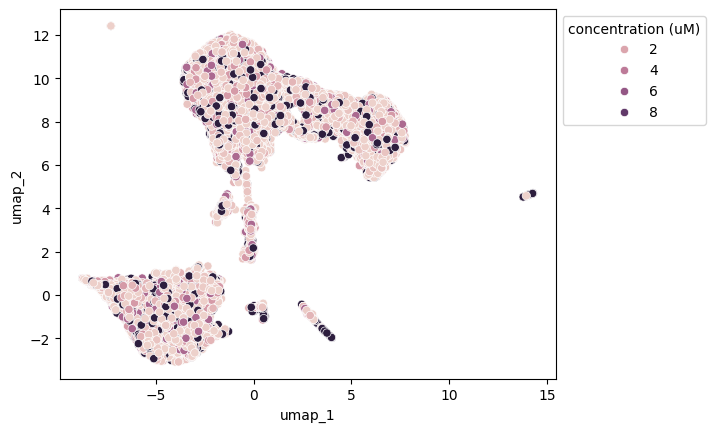

In [18]:
ue.plot(color_on='concentration (uM)', save='png', fname='example_output/plots/umap_conc')

In [35]:
ue.df['cluster_id'] = ue.df['cluster'].apply(lambda x: str(x))

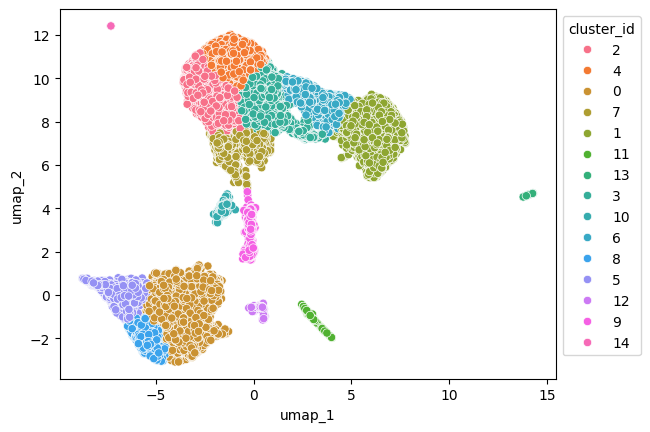

In [36]:
ue.plot(color_on='cluster_id', save='png', fname='example_output/plots/umap_cluster')

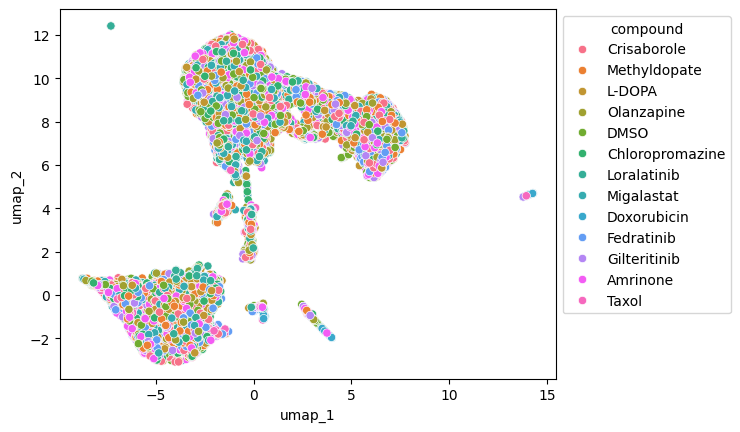

In [33]:
ue.plot(color_on='compound', save='png', fname='example_output/plots/umap_compound')